### 목표 : 무게에 따른 길이를 예측해주는 모델
- 데이터 : fish.csv
- 피쳐 : 무게
- 라벨/타겟 : 길이
- 학습방법 : 지도학습 + 예측 => KNN 기반의 회귀
- 학습/테스트 데이터 : 7:3 준비

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
fishDF = pd.read_csv('../data/fish.csv', usecols=[0,1,2])
perchDF = fishDF[fishDF['Species'] == 'Perch'].reset_index(drop=True)
perchDF

,Species,Weight,Length
0,Perch,5.9,8.4
1,Perch,32.0,13.7
2,Perch,40.0,15.0
3,Perch,51.5,16.2
4,Perch,70.0,17.4
5,Perch,100.0,18.0
6,Perch,78.0,18.7
7,Perch,80.0,19.0
8,Perch,85.0,19.6
9,Perch,85.0,20.0


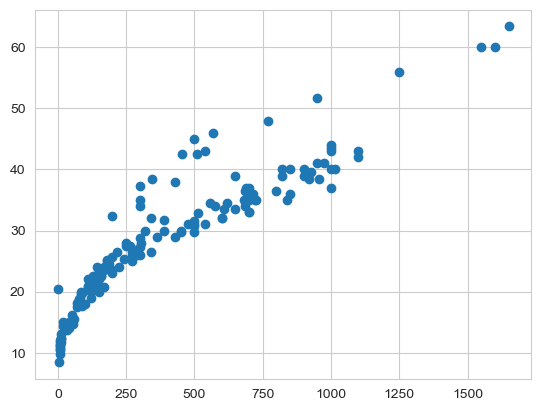

In [35]:
plt.scatter(fishDF['Weight'], fishDF['Length'])
plt.show()

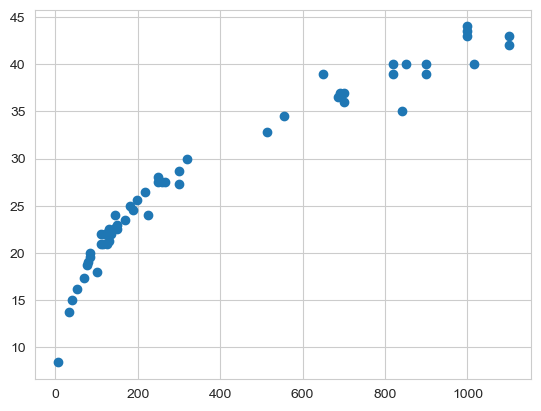

In [36]:
plt.scatter(perchDF['Weight'], perchDF['Length'])
plt.show()

In [37]:
featureDF = perchDF[['Weight']]
targetDF = perchDF['Length']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF,
                                                    test_size=0.3)

# X_train, X_val, y_train, y_val = train_test_split(featureDF, targetDF,
#                                                     test_size=0.1)

In [39]:
# scaler = StandardScaler()
# scaler.fit(X_train)

In [40]:
model = KNeighborsRegressor()

In [41]:
model.fit(X_train, y_train)

KNeighborsRegressor()

In [42]:
model.score(X_train, y_train)

0.9795187818320314

In [43]:
model.predict(X_test)

array([36.2 , 23.84, 18.02, 18.02, 38.6 , 27.26, 20.32, 27.26, 41.5 ,
       18.02, 27.26, 27.26, 21.66, 41.5 , 21.6 , 26.44, 21.66])

In [44]:
r2_score(y_test, model.predict(X_test))

0.9079627529682545

In [45]:
mean_squared_error(y_test, model.predict(X_test))

9.076847058823526

In [46]:
mean_absolute_error(y_test, model.predict(X_test))

2.0541176470588227

In [47]:
# K = default(5), 100번 시행
scoreDict = {'index':['val_score', 'test_score', 'r2_score', 'MSE', 'MAE']}
for i in range(100):
    scoreDict[f'trial {i}'] = []
    X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF,
                                                    test_size=0.3)
    
    # X_train, X_val, y_train, y_val = train_test_split(featureDF, targetDF,
    #                                                 test_size=0.1)
    
    model = KNeighborsRegressor()
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    scoreDict[f'trial {i}'].extend([
                        # model.score(X_val, y_val),
                        model.score(X_train, y_train),
                        model.score(X_test, y_test),
                        r2_score(y_test, predict),
                        mean_squared_error(y_test, predict),
                        mean_absolute_error(y_test, predict)])
    
    print(f'trial {i} ::\n'
          f'val_score = {scoreDict[f"trial {i}"][0]}\n'
          f'test_score= {scoreDict[f"trial {i}"][1]}\n'
          f'r2_score  = {scoreDict[f"trial {i}"][2]}\n'
          f'MSE       = {scoreDict[f"trial {i}"][3]}\n'
          f'MAE       = {scoreDict[f"trial {i}"][4]}\n\n')

trial 0 ::
val_score = 0.9716251240874926
test_score= 0.9411361507449577
r2_score  = 0.9411361507449577
MSE       = 5.022870588235295
MAE       = 1.1505882352941181


trial 1 ::
val_score = 0.9751492199092517
test_score= 0.9647708717113632
r2_score  = 0.9647708717113632
MSE       = 2.395458823529413
MAE       = 1.316470588235295


trial 2 ::
val_score = 0.9730294311279147
test_score= 0.963731043449464
r2_score  = 0.963731043449464
MSE       = 1.9478588235294092
MAE       = 1.1011764705882345


trial 3 ::
val_score = 0.9690863188061237
test_score= 0.9583679936093729
r2_score  = 0.9583679936093729
MSE       = 3.246000000000005
MAE       = 1.4388235294117662


trial 4 ::
val_score = 0.9804249803410777
test_score= 0.9103611412090953
r2_score  = 0.9103611412090953
MSE       = 7.769058823529409
MAE       = 1.843529411764706


trial 5 ::
val_score = 0.9799243355533768
test_score= 0.9433700011875247
r2_score  = 0.9433700011875247
MSE       = 3.2341647058823533
MAE       = 1.329411764705883


t

In [48]:
# 시행 결과 데이터프레임에 담기
scoreDF = pd.DataFrame(scoreDict)
scoreDF.set_index('index', inplace=True)
scoreDF.T

index,val_score,test_score,r2_score,MSE,MAE
trial 0,0.971625,0.941136,0.941136,5.022871,1.150588
trial 1,0.975149,0.964771,0.964771,2.395459,1.316471
trial 2,0.973029,0.963731,0.963731,1.947859,1.101176
trial 3,0.969086,0.958368,0.958368,3.246000,1.438824
trial 4,0.980425,0.910361,0.910361,7.769059,1.843529
...,...,...,...,...,...
trial 95,0.971072,0.954695,0.954695,3.061694,1.385882
trial 96,0.972022,0.956796,0.956796,1.355035,0.808235
trial 97,0.977625,0.932430,0.932430,6.030871,1.651765
trial 98,0.969287,0.943728,0.943728,4.634047,1.754118


In [49]:
scoreDF.T.describe()

index,val_score,test_score,r2_score,MSE,MAE
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.972317,0.949843,0.949843,3.868200,1.317718
std,0.006612,0.027837,0.027837,2.545894,0.334404
min,0.953228,0.820450,0.820450,0.727012,0.609412
25%,0.967759,0.933814,0.933814,2.027665,1.097059
50%,0.972807,0.956547,0.956547,2.829953,1.296471
75%,0.977454,0.969326,0.969326,5.561835,1.506176
max,0.986775,0.989964,0.989964,12.832541,2.441176


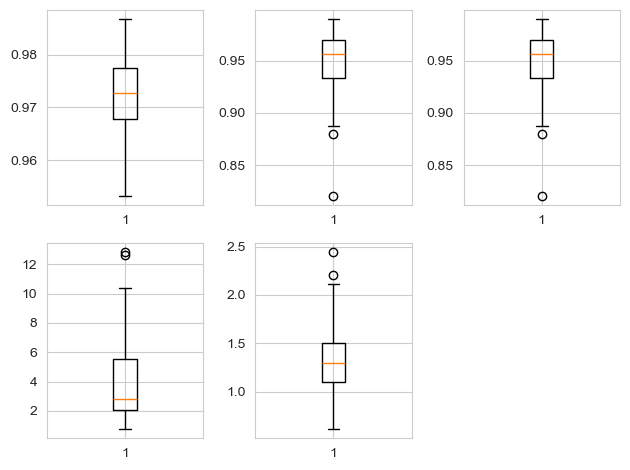

In [50]:
for i, col in enumerate(scoreDF.T.columns):
    plt.subplot(2, 3, i+1)
    plt.boxplot(scoreDF.T[col])
plt.tight_layout()
plt.show()

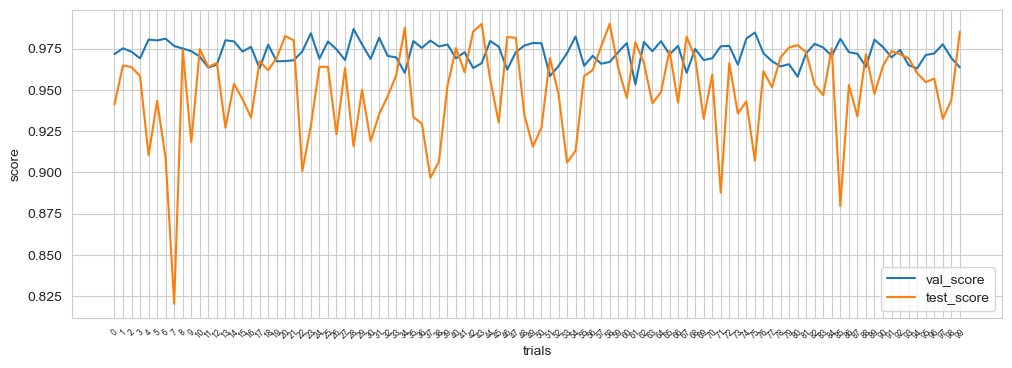

In [51]:
plt.figure(figsize=(12,4))
plt.plot(scoreDF.loc['val_score'], label='val_score')
plt.plot(scoreDF.loc['test_score'], label='test_score')
plt.xticks(ticks=scoreDF.columns, labels=[i.split(' ')[1] for i in scoreDF.columns], rotation=45, fontsize=6)
plt.xlabel('trials')
plt.ylabel('score')
plt.legend()
plt.show()

In [52]:
# K가 1에서 최대일 때 시행
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF,
                                                test_size=0.3)

# X_train, X_val, y_train, y_val = train_test_split(featureDF, targetDF,
#                                                 test_size=0.1)

scoreDict2 = {'index':['val_score', 'test_score', 'r2_score', 'MSE', 'MAE']}
for i in range(len(X_train)):
    scoreDict2[f'K={i}'] = []
    
    model = KNeighborsRegressor(n_neighbors=i+1)
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    scoreDict2[f'K={i}'].extend([
                        # model.score(X_val, y_val),
                        model.score(X_train, y_train),
                        model.score(X_test, y_test),
                        r2_score(y_test, predict),
                        mean_squared_error(y_test, predict),
                        mean_absolute_error(y_test, predict)])
    
    print(f'K={i} ::\n'
          f'val_score = {scoreDict2[f"K={i}"][0]}\n'
          f'test_score= {scoreDict2[f"K={i}"][1]}\n'
          f'r2_score  = {scoreDict2[f"K={i}"][2]}\n'
          f'MSE       = {scoreDict2[f"K={i}"][3]}\n'
          f'MAE       = {scoreDict2[f"K={i}"][4]}\n\n')

K=0 ::
val_score = 0.9987298733320572
test_score= 0.971399966085918
r2_score  = 0.971399966085918
MSE       = 2.7429411764705875
MAE       = 1.1352941176470586


K=1 ::
val_score = 0.9852484870696733
test_score= 0.9673718570846156
r2_score  = 0.9673718570846156
MSE       = 3.1292647058823526
MAE       = 1.032352941176471


K=2 ::
val_score = 0.9802055220558374
test_score= 0.9557114160171478
r2_score  = 0.9557114160171478
MSE       = 4.247581699346405
MAE       = 1.2745098039215685


K=3 ::
val_score = 0.9755726161198406
test_score= 0.9463603695913353
r2_score  = 0.9463603695913353
MSE       = 5.144411764705882
MAE       = 1.2588235294117647


K=4 ::
val_score = 0.974122106699349
test_score= 0.944371554022607
r2_score  = 0.944371554022607
MSE       = 5.335152941176468
MAE       = 1.2188235294117642


K=5 ::
val_score = 0.9729021954385751
test_score= 0.9382012468035176
r2_score  = 0.9382012468035176
MSE       = 5.926928104575163
MAE       = 1.333333333333334


K=6 ::
val_score = 0.969770

In [53]:
# 시행 결과 데이터프레임에 담기
scoreDF2 = pd.DataFrame(scoreDict2)
scoreDF2 = scoreDF2.set_index('index').T
scoreDF2

index,val_score,test_score,r2_score,MSE,MAE
K=0,9.987299e-01,0.971400,0.971400,2.742941,1.135294
K=1,9.852485e-01,0.967372,0.967372,3.129265,1.032353
K=2,9.802055e-01,0.955711,0.955711,4.247582,1.274510
K=3,9.755726e-01,0.946360,0.946360,5.144412,1.258824
K=4,9.741221e-01,0.944372,0.944372,5.335153,1.218824
K=5,9.729022e-01,0.938201,0.938201,5.926928,1.333333
K=6,9.697709e-01,0.934134,0.934134,6.317023,1.438655
K=7,9.643968e-01,0.928169,0.928169,6.889053,1.444853
K=8,9.541261e-01,0.914287,0.914287,8.220443,1.771895
K=9,9.453802e-01,0.899248,0.899248,9.662835,2.027059


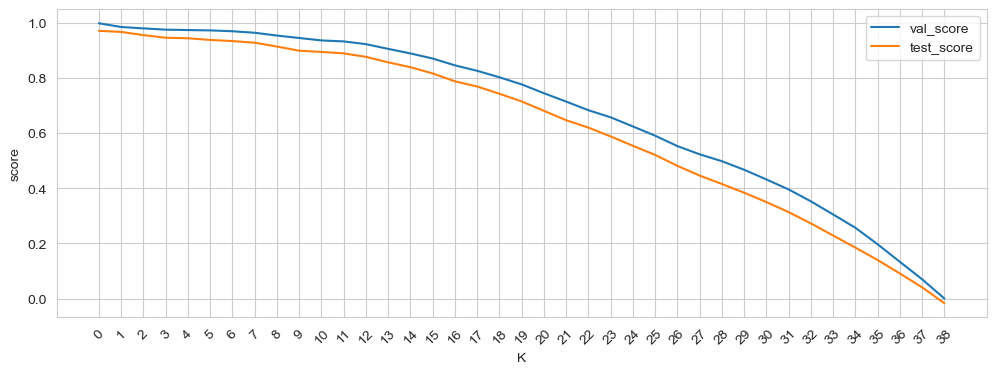

In [54]:
plt.figure(figsize=(12, 4))
plt.plot(scoreDF2['val_score'], label='val_score')
plt.plot(scoreDF2['test_score'], label='test_score')
plt.xticks(ticks=scoreDF2.index, labels=[i.split('=')[1] for i in scoreDF2.index], rotation=45)
plt.xlabel('K')
plt.ylabel('score')
plt.legend()
plt.show()

In [55]:
scoreDF2.describe()

index,val_score,test_score,r2_score,MSE,MAE
count,3.900000e+01,39.000000,39.000000,39.000000,39.000000
mean,6.828349e-01,0.629002,0.629002,35.581266,4.260956
std,2.956076e-01,0.303747,0.303747,29.131405,2.406210
min,6.661338e-16,-0.017235,-0.017235,2.742941,1.032353
25%,4.827460e-01,0.399778,0.399778,9.886442,2.027701
50%,7.770574e-01,0.715188,0.715188,27.315404,4.155000
75%,9.409158e-01,0.896916,0.896916,57.565429,6.421694
max,9.987299e-01,0.971400,0.971400,97.559871,8.241327


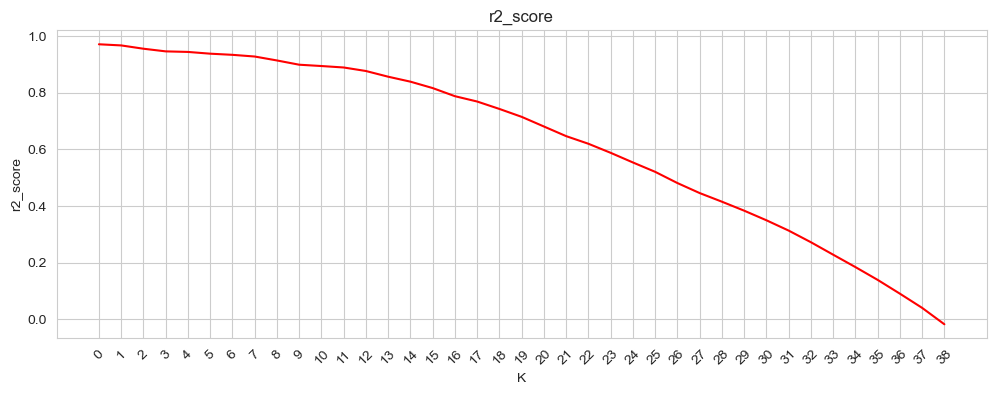

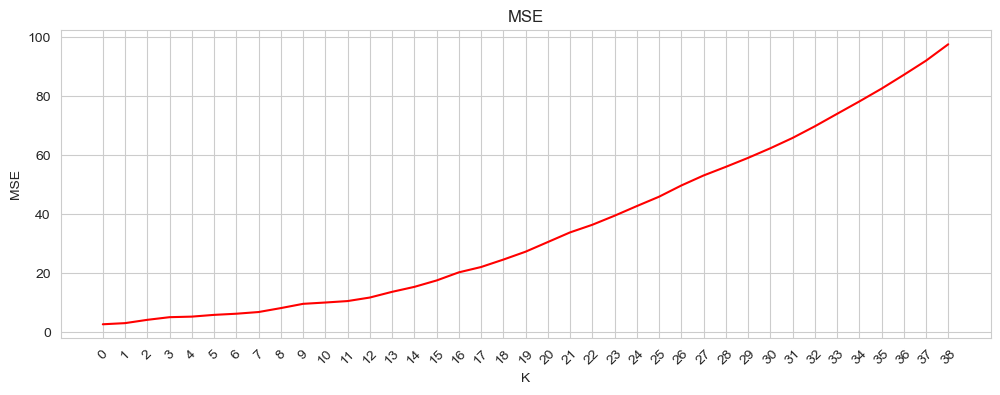

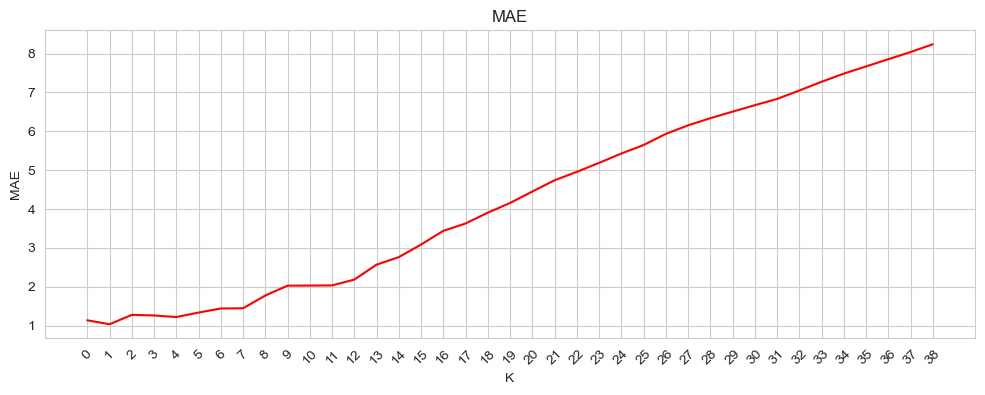

In [56]:
for col in scoreDF2.columns[2:]:
    plt.figure(figsize=(12, 4))
    plt.plot(scoreDF2[col], label=col, color='red')
    plt.xticks(ticks=scoreDF2.index, labels=[i.split('=')[1] for i in scoreDF2.index], rotation=45)
    plt.title(col)
    plt.xlabel('K')
    plt.ylabel(col)
    plt.show()

In [57]:
mean_absolute_error(y_test, model.predict(X_test))
# K = 3, 100번 시행
scoreDict3 = {'index': ['val_score', 'test_score', 'r2_score', 'MSE', 'MAE']}
for i in range(100):
    scoreDict3[f'trial {i}'] = []
    X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF,
                                                        test_size=0.3)
                                                        

    # X_train, X_val, y_train, y_val = train_test_split(featureDF, targetDF,
    #                                                 test_size=0.1)

    model = KNeighborsRegressor(n_neighbors=3)
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    scoreDict3[f'trial {i}'].extend([
        # model.score(X_val, y_val),
        model.score(X_train, y_train),
        model.score(X_test, y_test),
        r2_score(y_test, predict),
        mean_squared_error(y_test, predict),
        mean_absolute_error(y_test, predict)])

    print(f'trial {i} ::\n'
          f'val_score = {scoreDict3[f"trial {i}"][0]}\n'
          f'test_score= {scoreDict3[f"trial {i}"][1]}\n'
          f'r2_score  = {scoreDict3[f"trial {i}"][2]}\n'
          f'MSE       = {scoreDict3[f"trial {i}"][3]}\n'
          f'MAE       = {scoreDict3[f"trial {i}"][4]}\n\n')

trial 0 ::
val_score = 0.9718677214806564
test_score= 0.9812768205191725
r2_score  = 0.9812768205191725
MSE       = 1.6039869281045736
MAE       = 0.9235294117647054


trial 1 ::
val_score = 0.9831965206941025
test_score= 0.955607165769943
r2_score  = 0.955607165769943
MSE       = 2.2474509803921556
MAE       = 0.952941176470588


trial 2 ::
val_score = 0.9844633544448508
test_score= 0.9503594958571012
r2_score  = 0.9503594958571012
MSE       = 4.830326797385618
MAE       = 1.478431372549019


trial 3 ::
val_score = 0.9819353947742984
test_score= 0.9497035939236754
r2_score  = 0.9497035939236754
MSE       = 2.5552941176470614
MAE       = 1.337254901960785


trial 4 ::
val_score = 0.9799966288216796
test_score= 0.9296366230394395
r2_score  = 0.9296366230394395
MSE       = 5.294379084967317
MAE       = 1.3137254901960784


trial 5 ::
val_score = 0.9826348988425889
test_score= 0.9742764179603451
r2_score  = 0.9742764179603451
MSE       = 1.8317647058823532
MAE       = 1.0784313725490196



In [58]:
# 시행 결과 데이터프레임에 담기
scoreDF3 = pd.DataFrame(scoreDict3)
scoreDF3 = scoreDF3.set_index('index').T
scoreDF3

index,val_score,test_score,r2_score,MSE,MAE
trial 0,0.971868,0.981277,0.981277,1.603987,0.923529
trial 1,0.983197,0.955607,0.955607,2.247451,0.952941
trial 2,0.984463,0.950359,0.950359,4.830327,1.478431
trial 3,0.981935,0.949704,0.949704,2.555294,1.337255
trial 4,0.979997,0.929637,0.929637,5.294379,1.313725
...,...,...,...,...,...
trial 95,0.980359,0.977369,0.977369,1.647778,1.100000
trial 96,0.979235,0.956736,0.956736,3.263725,1.413725
trial 97,0.977856,0.970725,0.970725,2.462157,1.174510
trial 98,0.978381,0.972357,0.972357,2.272157,1.031373


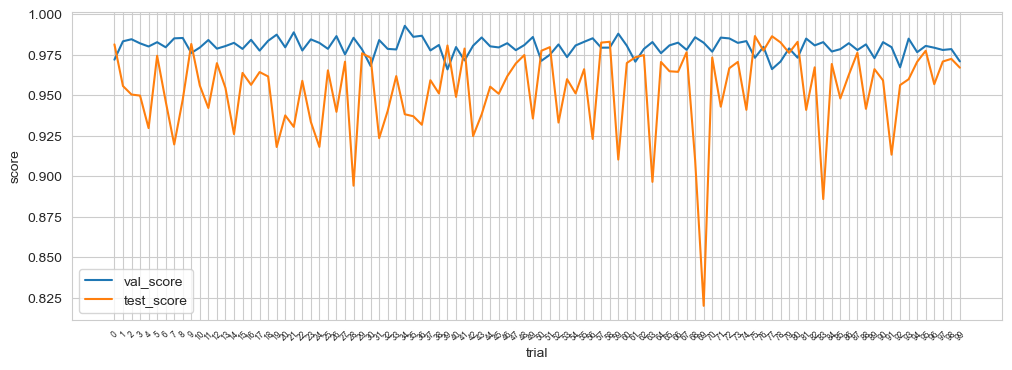

In [59]:
plt.figure(figsize=(12, 4))
plt.plot(scoreDF3['val_score'], label='val_score')
plt.plot(scoreDF3['test_score'], label='test_score')
plt.xticks(ticks=scoreDF3.index, labels=[i.split(' ')[1] for i in scoreDF3.index], rotation=45, fontsize=6)
plt.xlabel('trial')
plt.ylabel('score')
plt.legend()
plt.show()

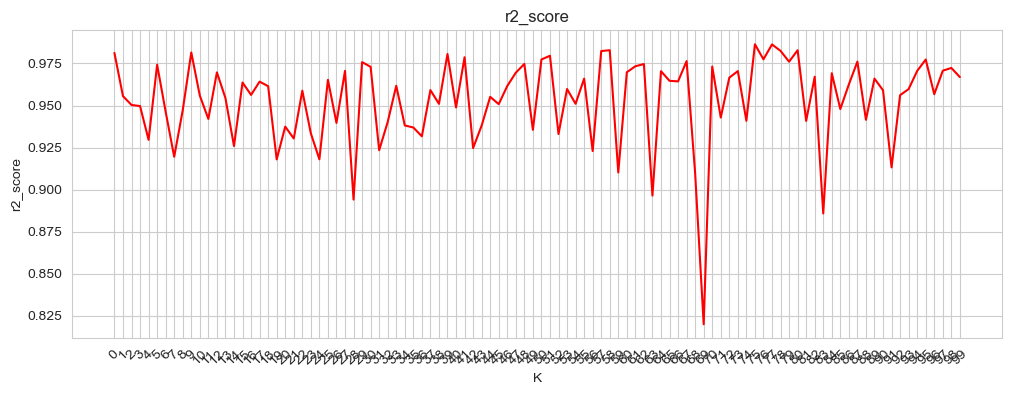

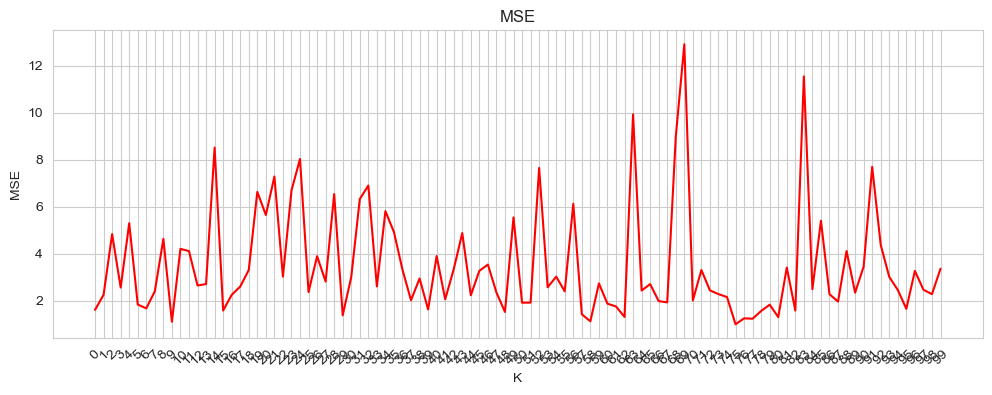

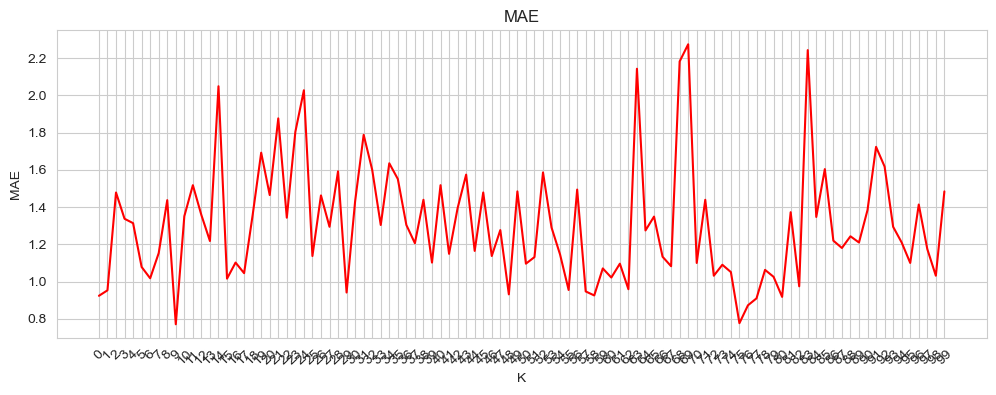

In [60]:
for col in scoreDF3.columns[2:]:
    plt.figure(figsize=(12, 4))
    plt.plot(scoreDF3[col], label=col, color='red')
    plt.xticks(ticks=scoreDF3.index, labels=[i.split(' ')[1] for i in scoreDF3.index], rotation=45)
    plt.title(col)
    plt.xlabel('K')
    plt.ylabel(col)
    plt.show()

In [61]:
# K = 7, 100번 시행
scoreDict4 = {'index': ['val_score', 'test_score', 'r2_score', 'MSE', 'MAE']}
for i in range(100):
    scoreDict4[f'trial {i}'] = []
    X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF,
                                                        test_size=0.3)

    # X_train, X_val, y_train, y_val = train_test_split(featureDF, targetDF,
    #                                                 test_size=0.1)

    model = KNeighborsRegressor(n_neighbors=7)
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    scoreDict4[f'trial {i}'].extend([
        # model.score(X_val, y_val),
        model.score(X_train, y_train),
        model.score(X_test, y_test),
        r2_score(y_test, predict),
        mean_squared_error(y_test, predict),
        mean_absolute_error(y_test, predict)])

    print(f'trial {i} ::\n'
          f'val_score = {scoreDict4[f"trial {i}"][0]}\n'
          f'test_score= {scoreDict4[f"trial {i}"][1]}\n'
          f'r2_score  = {scoreDict4[f"trial {i}"][2]}\n'
          f'MSE       = {scoreDict4[f"trial {i}"][3]}\n'
          f'MAE       = {scoreDict4[f"trial {i}"][4]}\n\n')

trial 0 ::
val_score = 0.9705152514678357
test_score= 0.9570976734442607
r2_score  = 0.9570976734442607
MSE       = 3.091452581032414
MAE       = 1.2521008403361347


trial 1 ::
val_score = 0.9784326308535298
test_score= 0.8779129141628256
r2_score  = 0.8779129141628256
MSE       = 11.997214885954385
MAE       = 2.1848739495798326


trial 2 ::
val_score = 0.9764965326007998
test_score= 0.9023385750914353
r2_score  = 0.9023385750914353
MSE       = 6.984501800720288
MAE       = 1.6966386554621853


trial 3 ::
val_score = 0.954928914717051
test_score= 0.9747483085533899
r2_score  = 0.9747483085533899
MSE       = 1.9878271308523399
MAE       = 0.9159663865546219


trial 4 ::
val_score = 0.9550056863016881
test_score= 0.9425805715367527
r2_score  = 0.9425805715367527
MSE       = 3.4422689075630246
MAE       = 1.528571428571428


trial 5 ::
val_score = 0.9474896652966331
test_score= 0.9725343815306728
r2_score  = 0.9725343815306728
MSE       = 2.509243697478988
MAE       = 1.2974789915966378

In [62]:
# 시행 결과 데이터프레임에 담기
scoreDF4 = pd.DataFrame(scoreDict4)
scoreDF4 = scoreDF4.set_index('index').T
scoreDF4

index,val_score,test_score,r2_score,MSE,MAE
trial 0,0.970515,0.957098,0.957098,3.091453,1.252101
trial 1,0.978433,0.877913,0.877913,11.997215,2.184874
trial 2,0.976497,0.902339,0.902339,6.984502,1.696639
trial 3,0.954929,0.974748,0.974748,1.987827,0.915966
trial 4,0.955006,0.942581,0.942581,3.442269,1.528571
...,...,...,...,...,...
trial 95,0.961035,0.973933,0.973933,2.036339,1.140336
trial 96,0.980099,0.885911,0.885911,11.174718,2.015126
trial 97,0.957798,0.960578,0.960578,3.322761,1.364706
trial 98,0.963048,0.979915,0.979915,1.431297,0.995798


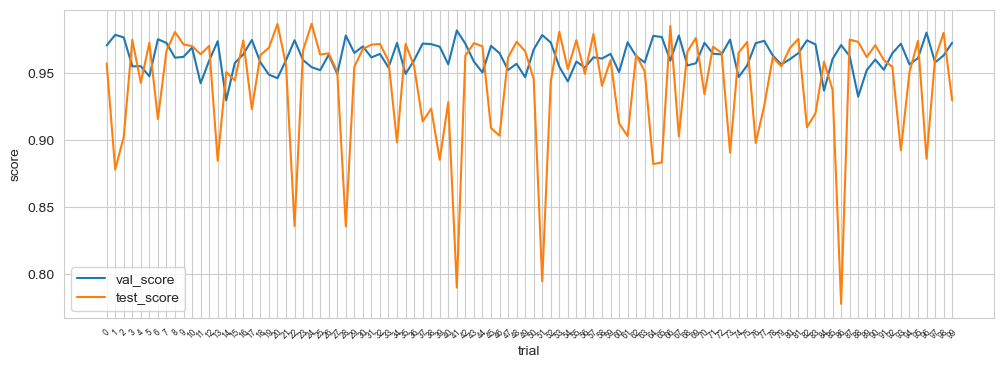

In [63]:
plt.figure(figsize=(12, 4))
plt.plot(scoreDF4['val_score'], label='val_score')
plt.plot(scoreDF4['test_score'], label='test_score')
plt.xticks(ticks=scoreDF4.index, labels=[i.split(' ')[1] for i in scoreDF4.index], rotation=45, fontsize=6)
plt.xlabel('trial')
plt.ylabel('score')
plt.legend()
plt.show()

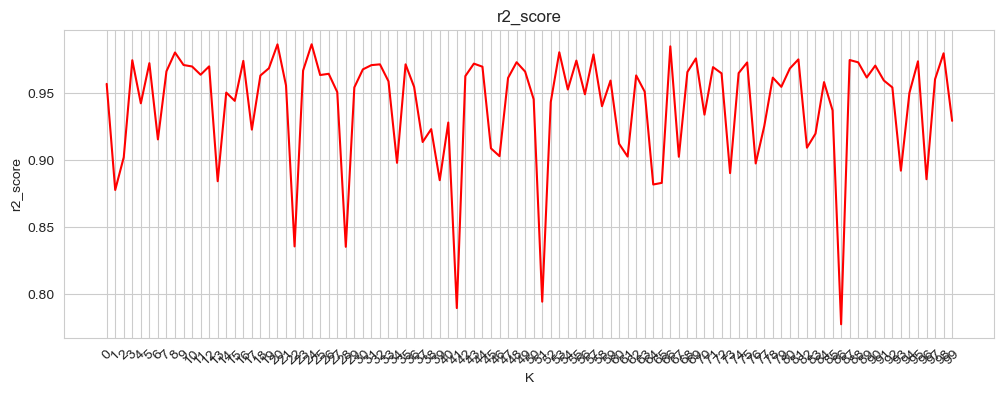

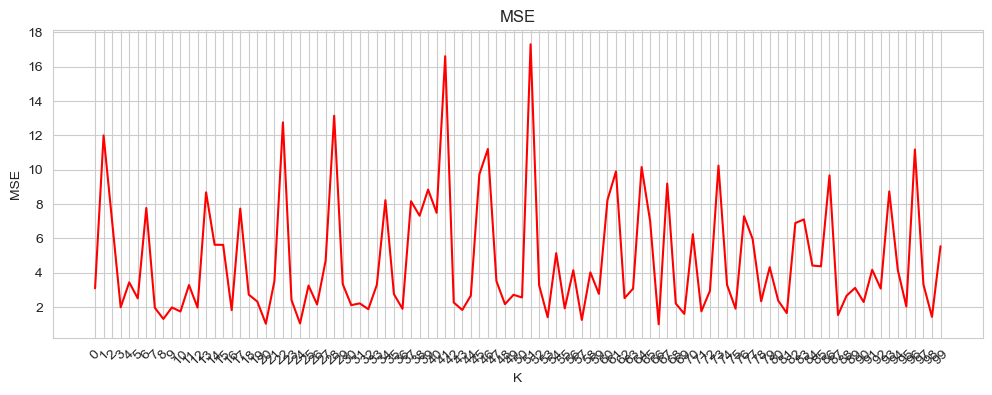

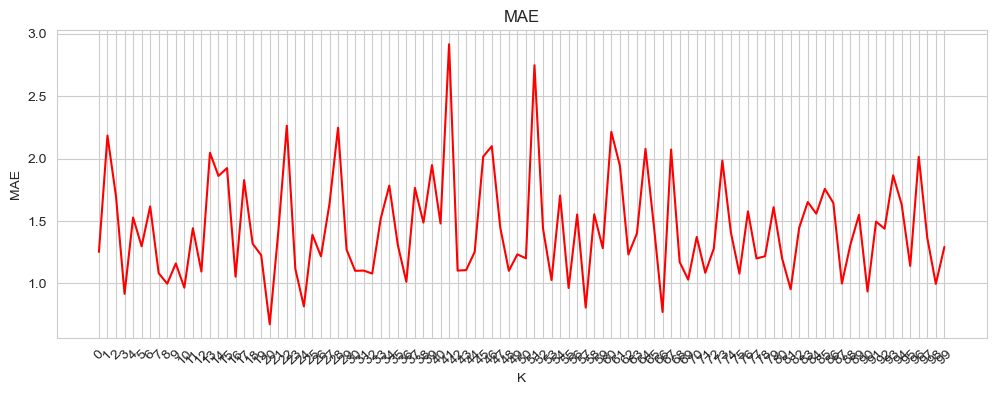

In [64]:
for col in scoreDF3.columns[2:]:
    plt.figure(figsize=(12, 4))
    plt.plot(scoreDF4[col], label=col, color='red')
    plt.xticks(ticks=scoreDF4.index, labels=[i.split(' ')[1] for i in scoreDF4.index], rotation=45)
    plt.title(col)
    plt.xlabel('K')
    plt.ylabel(col)
    plt.show()